<a href="https://colab.research.google.com/github/Madera610/Archivos-IA_y_RD-AGO-DIC-2025-2108162/blob/main/Actividades/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AF8. Redes Neuronales Convolucionales**

Integrantes:

Blas Eduardo Escobar Rodriguez 1903990 N5

Gael Guevara Puente 2049066 N5

Ana Camila Parra Aguilar 2052187 N5

Christopher Daniel Candelario López 2001039 N5

Jonathan Gonzalez Zuñiga 2108162 N5

# **Explicación de la actividad**
El objetivo del notebook es entrenar a un modelo de Red Neuronal Convolucional.

Primero implementamos el código para que la red neuronal pueda clasificar las imagenes del conjunto de datos de MNIST.

1. Cargamos los datos y se hace el preprocesamiento, en donde normalizamos los valores y ajustamos el tamaño de las imagenes.

2. Hacemos las capas convolucionales y de pooling para obtener las características  para hacer las clasificación por medio de la función softmax.

3. Se utiliza el optimizador y la función de pérdida para evaluar el desempeño con la exactitud (accuracy)

4. Entrenamos, evaluamos y probamos las predicciones del modelo sobre las imagenes de prueba, observando que muestra los valores reales como las predicciones.

1. Cargar librerias

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2. Carga de datos

In [ ]:
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Normalización de datos

In [ ]:
# Normalizamos de rango [0,1]
train_data = train_data.astype('float32') / 255.0
test_data  = test_data.astype('float32')  / 255.0



4. Verificación de datos

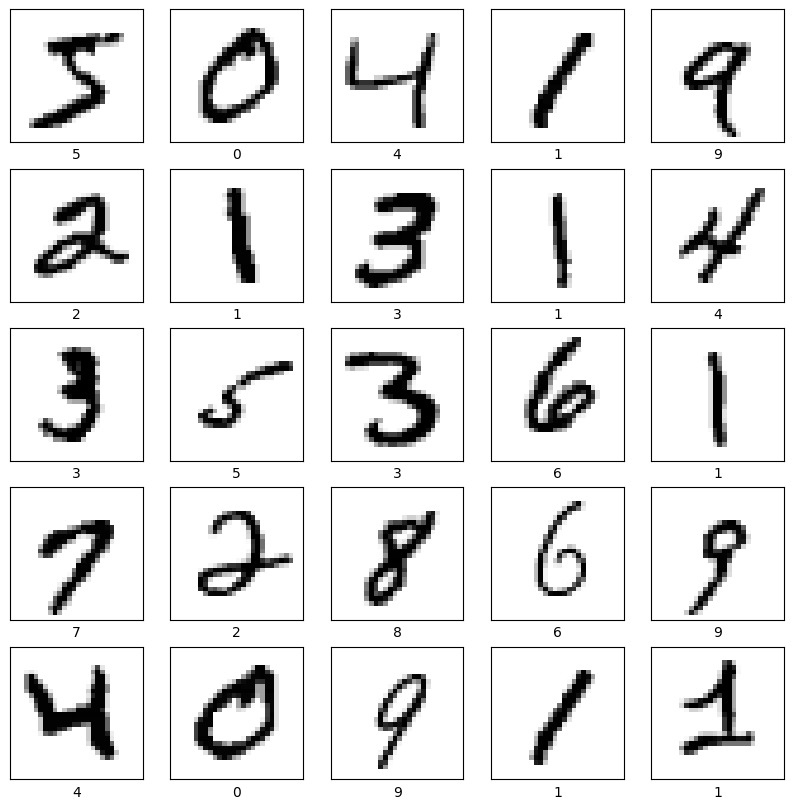

In [ ]:
# Añadimos una dimensión de canal para compatibilidad con Conv2D
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data  = test_data.reshape((test_data.shape[0], 28, 28, 1))

# Nombramos a las clases (0-9 dígitos)
class_names = [str(i) for i in range(10)]

# Mostrar algunas imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


5. Selección y entrenamiento del modelo

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(train_data, train_labels, epochs=epochs,
                    validation_data=(test_data, test_labels))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8990 - loss: 0.3244 - val_accuracy: 0.9844 - val_loss: 0.0474
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9864 - loss: 0.0441 - val_accuracy: 0.9872 - val_loss: 0.0369
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9893 - val_loss: 0.0338
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9915 - val_loss: 0.0268
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9908 - val_loss: 0.0323
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 0.9899 - val_loss: 0.0358
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9961 - loss: 0.0109 - val_accuracy: 0.9932 - val_loss: 0.0296
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9972 -

6. Graficar exactitud

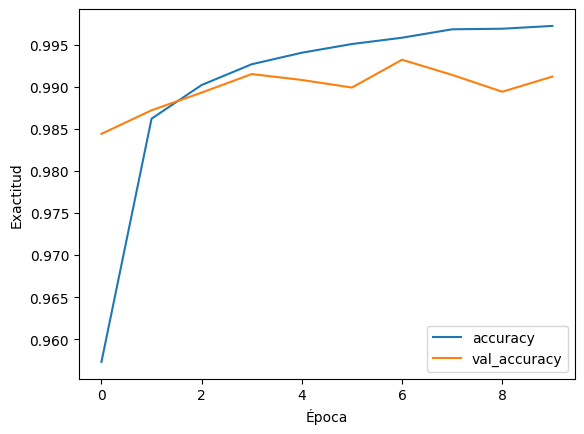

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend(loc='lower right')
plt.show()


7. Prueba del modelo

313/313 - 4s - 12ms/step - accuracy: 0.9912 - loss: 0.0375

Exactitud del modelo en datos de prueba: 0.9912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


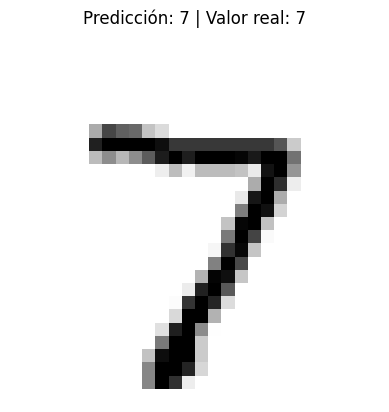

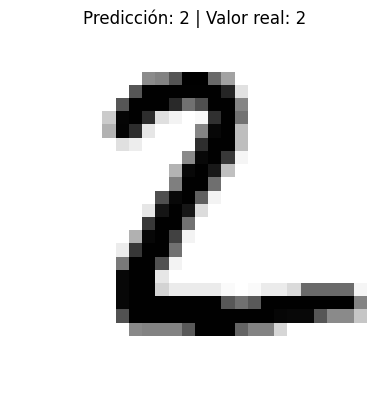

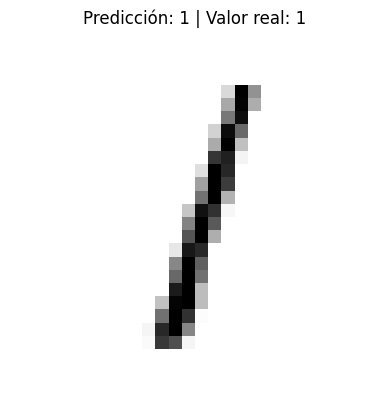

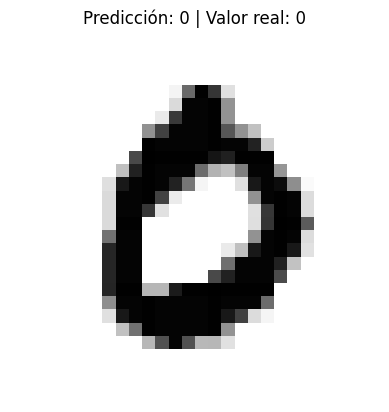

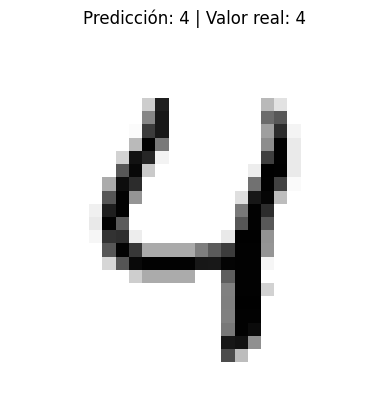

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc:.4f}")

#Realizamos las 5 predicciones y mostramos los resultados
predictions = model.predict(test_data[:5])
for i in range(5):
    plt.imshow(test_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title(f"Predicción: {class_names[np.argmax(predictions[i])]} | Valor real: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()

1.	¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

Se uso el comando epochs y fueron 10

2.	¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5?¿Por qué?

Consideramos que con esta, ya que, hubo una mayor resolución con las imágenes
